# House Price Regression Analysis

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

In [2]:
#importing datasets

data=pd.read_csv("C:\\Users\\Philomina\\Documents\\Project\\Hyderabad.csv")

In [3]:
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
#TO obtain the shape of the dataframe # Df made of rows and colums

data.shape

(2518, 40)

In [5]:
#  label the each column in the DataFrame

data.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [6]:
#Type of the data describes

data.dtypes

Price                   int64
Area                    int64
Location               object
No. of Bedrooms         int64
Resale                  int64
MaintenanceStaff        int64
Gymnasium               int64
SwimmingPool            int64
LandscapedGardens       int64
JoggingTrack            int64
RainWaterHarvesting     int64
IndoorGames             int64
ShoppingMall            int64
Intercom                int64
SportsFacility          int64
ATM                     int64
ClubHouse               int64
School                  int64
24X7Security            int64
PowerBackup             int64
CarParking              int64
StaffQuarter            int64
Cafeteria               int64
MultipurposeRoom        int64
Hospital                int64
WashingMachine          int64
Gasconnection           int64
AC                      int64
Wifi                    int64
Children'splayarea      int64
LiftAvailable           int64
BED                     int64
VaastuCompliant         int64
Microwave 

In [7]:
#prints information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2518 non-null   int64 
 1   Area                 2518 non-null   int64 
 2   Location             2518 non-null   object
 3   No. of Bedrooms      2518 non-null   int64 
 4   Resale               2518 non-null   int64 
 5   MaintenanceStaff     2518 non-null   int64 
 6   Gymnasium            2518 non-null   int64 
 7   SwimmingPool         2518 non-null   int64 
 8   LandscapedGardens    2518 non-null   int64 
 9   JoggingTrack         2518 non-null   int64 
 10  RainWaterHarvesting  2518 non-null   int64 
 11  IndoorGames          2518 non-null   int64 
 12  ShoppingMall         2518 non-null   int64 
 13  Intercom             2518 non-null   int64 
 14  SportsFacility       2518 non-null   int64 
 15  ATM                  2518 non-null   int64 
 16  ClubHo

In [8]:
data.drop(columns=["Location"],axis=1,inplace=True)

In [9]:
#returns the number of missing values in the dataset.

data.isnull().sum()

Price                  0
Area                   0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0
dtype: int64

In [10]:
#returns description of the data in the DataFrame

data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,...,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,9.818380e+06,1644.571088,2.623511,0.227562,0.412629,0.739873,0.709690,0.619142,0.559968,0.606434,...,0.975774,0.360207,0.607228,0.342732,0.330024,0.321287,0.334392,0.342335,0.341144,0.324861
std,8.777113e+06,746.256956,0.687330,0.419341,1.626445,1.611024,1.615231,1.624426,1.627686,1.625308,...,1.557725,1.622778,1.625256,1.621178,1.619894,1.618953,1.620347,1.621139,1.621023,1.619344
min,2.000000e+06,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.760000e+06,1160.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.754000e+06,1500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.090000e+07,1829.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.650000e+08,9400.000000,8.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [11]:
#analyzing duplicate values

Dup_values=data.duplicated()
print("No of Duplicate values",Dup_values)

No of Duplicate values 0       False
1       False
2       False
3       False
4       False
        ...  
2513    False
2514    False
2515    False
2516    False
2517    False
Length: 2518, dtype: bool


# Data Visualization

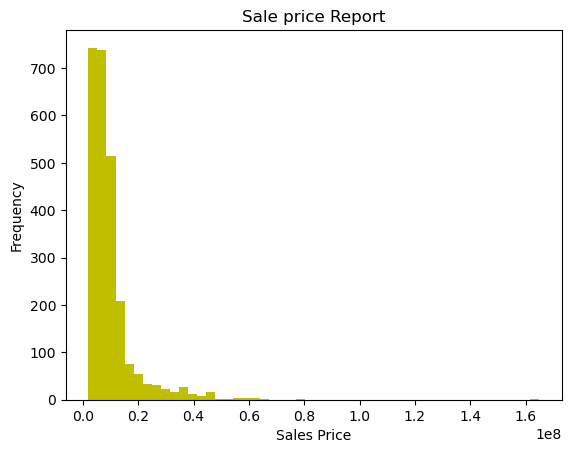

In [12]:
plt.hist(data["Price"],bins=50,color="y")
plt.xlabel("Sales Price")
plt.ylabel("Frequency")
plt.title("Sale price Report")
plt.show()

<Axes: >

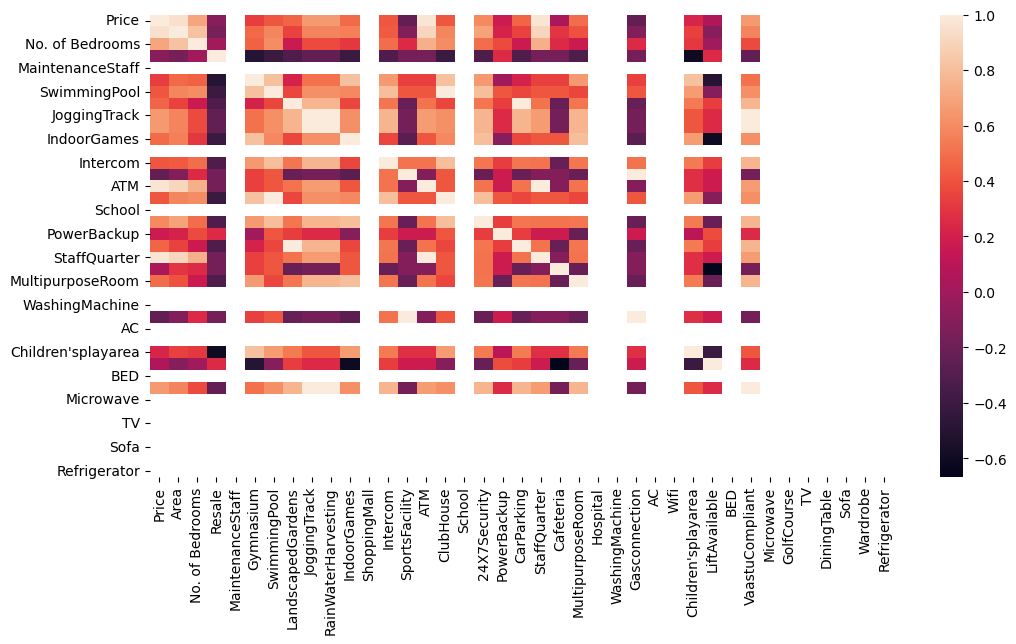

In [13]:
#correlation Matrix
df=data.head(10)
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr())         

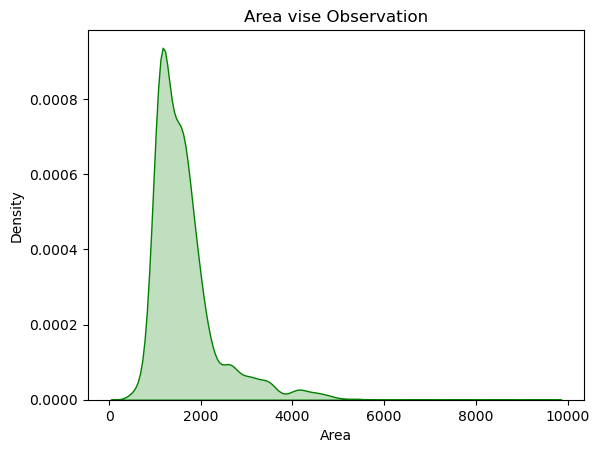

In [14]:
sns.kdeplot(data["Area"],fill=True,color="g")
plt.title("Area vise Observation")
plt.show()

### Model Selection and Prediction

# Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
#Extracting dependent and independent Variables

x=data.drop(["Price"],axis=1) 
y=data.Price

In [17]:
# Splitting the dataset into training and test set. 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [18]:
x_train.shape

(2014, 38)

In [19]:
y_train.shape

(2014,)

In [20]:
x_test.shape

(504, 38)

In [21]:
y_test.shape

(504,)

In [22]:
#Fitting the MLR model to the training set:  
 
regressor= LinearRegression()  
regressor.fit(x_train, y_train)   #accurately predict the o/p

LinearRegression()

In [23]:
#Predicting the Test set result;  

y_pred= regressor.predict(x_test)

In [24]:
#check the score for training dataset and test dataset


print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))

Train Score:  0.7059802293283484
Test Score:  0.7095134799874225


# Random Forest Regression

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Split the training set into training and validation set

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.8, test_size=0.2)

model_RFR = RandomForestRegressor()
model_RFR.fit(x_train, y_train)
y_pred = model_RFR.predict(x_test)
print(mean_absolute_error(y_test, y_pred))

1664085.6970161148


In [26]:
y_pred = model_RFR.predict(x_test)
print(mean_absolute_error(y_test, y_pred))

1664085.6970161148


In [27]:
Y_Pred = regressor.predict(x_test)

In [28]:
#Fitting the MLR model to the training set:  
from sklearn.ensemble import RandomForestRegressor

rfrgrsr= RandomForestRegressor(max_features=40)  
rfrgrsr.fit(x_train, y_train) 

RandomForestRegressor(max_features=40)

In [30]:
#check the score for training dataset and test dataset

print('Train Score: ', rfrgrsr.score(x_train, y_train))  
print('Test Score: ', rfrgrsr.score(x_test, y_test))

Train Score:  0.9401391646607845
Test Score:  0.8115244757211534


# Adaboost Regression

In [31]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()

In [32]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_regr = AdaBoostRegressor(random_state=0, n_estimators=100,learning_rate=3e-5)
adaboost_regr.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=3e-05, n_estimators=100, random_state=0)

In [33]:
print('Train Score: ', adaboost_regr.score(x_train, y_train))  
print('Test Score: ', adaboost_regr.score(x_test, y_test))

Train Score:  0.7207585830772612
Test Score:  0.7902154125668545


# Conclusion

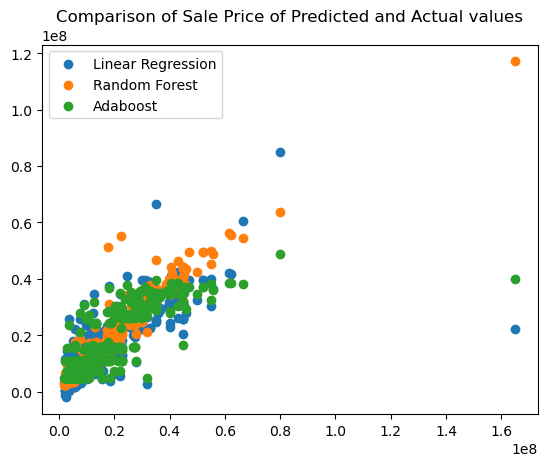

In [34]:
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(y_train,regressor.predict(x_train),label='Linear Regression')
plt.scatter(y_train,rfrgrsr.predict(x_train),label='Random Forest')
plt.scatter(y_train,adaboost_regr.predict(x_train),label='Adaboost')
plt.legend()   

# Thank you